In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the model

from sklearn import linear_model


#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_csv('/Users/jenniferdersjant/downloads/clean_marketing1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9134 non-null   int64  
 1   customer                       9134 non-null   object 
 2   state                          9134 non-null   object 
 3   customer_lifetime_value        9134 non-null   float64
 4   response                       9134 non-null   object 
 5   coverage                       9134 non-null   object 
 6   education                      9134 non-null   object 
 7   effective_to_date              9134 non-null   object 
 8   employmentstatus               9134 non-null   object 
 9   gender                         9134 non-null   object 
 10  income                         9134 non-null   int64  
 11  location_code                  9134 non-null   object 
 12  marital_status                 9134 non-null   o

In [5]:
## Change headers names. Deal with NaN values, replace with appropriate method.

data.isna().sum()

Unnamed: 0                       0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
effective_to_date_month          0
dtype: int64

In [6]:
## Explore visually both sets of features, to identify next steps.

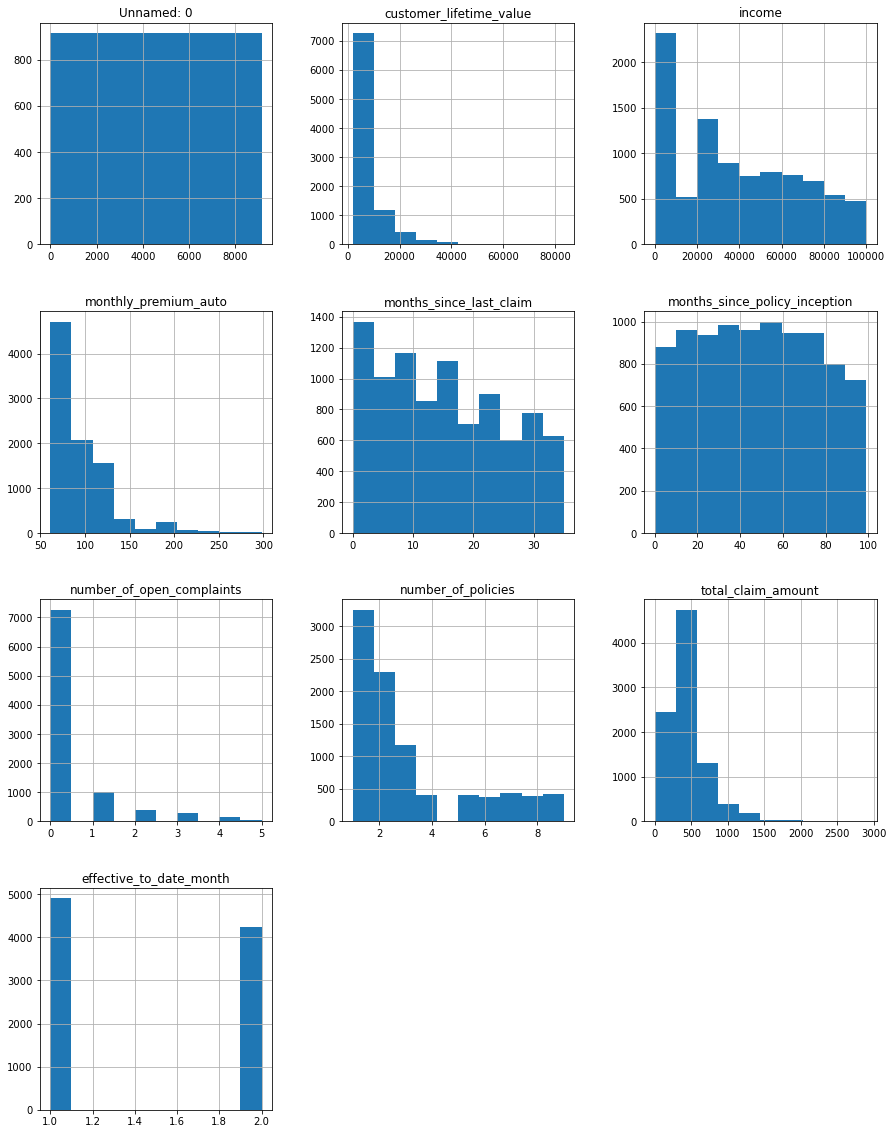

In [8]:
data.hist(figsize = (15,20));

/Users/jenniferdersjant/opt/anaconda3/envs/Ironhack_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


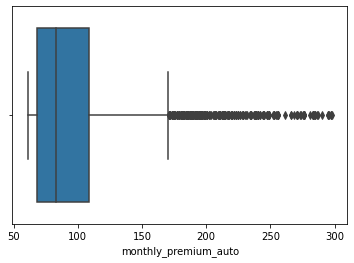

In [9]:
sns.boxplot('monthly_premium_auto', data=data)

In [11]:
## Dealing with outliers.  
iqr=np.percentile(data['monthly_premium_auto'],75)-np.percentile(data['monthly_premium_auto'],25)
upper_limit=np.percentile(data['monthly_premium_auto'],75)+(1.5*iqr)
lower_limit=np.percentile(data['monthly_premium_auto'],25)-(1.5*iqr)
excl_outliers=data[(data['monthly_premium_auto']>lower_limit)&(data['monthly_premium_auto']<upper_limit)]
excl_outliers

,Unnamed: 0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_month
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


/Users/jenniferdersjant/opt/anaconda3/envs/Ironhack_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


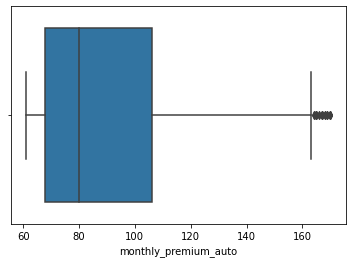

In [12]:
sns.boxplot('monthly_premium_auto', data=excl_outliers)

In [13]:
data['effective_to_date'].dtype
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['effective_to_date'].dtype
data.head()

,Unnamed: 0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_month
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [14]:
## Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns

from sklearn.preprocessing import MinMaxScaler 

transform=MinMaxScaler().fit([data['effective_to_date']])
x_mmscaled=transform.transform([data['effective_to_date']])

In [15]:
## split categorical Features and Numerical Features.
X_num = data.select_dtypes(include = np.number)

In [16]:
X_num.head()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
0,0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,3,7645.861827,0,106,18,65,0,7,529.881344,1
4,4,2813.692575,43836,73,12,44,0,1,138.130879,2


In [17]:
X_num.shape

(9134, 10)

In [18]:
X_cat = data.select_dtypes(include = object)

In [19]:
X_cat.shape

(9134, 15)

In [20]:
X_cat.head(0)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size


In [21]:
## Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model
from sklearn.preprocessing import RobustScaler
robust=RobustScaler().fit(X_num)
x_robust=robust.transform(X_num)

In [22]:
## Define X and y, the y value you are seeking to predict is claim amount.
y=X_num['total_claim_amount']

In [23]:
X=X_num.drop(['total_claim_amount'],axis=1)

In [24]:
lm=linear_model.LinearRegression()

In [25]:
# fit the model to our data (only numerical data)
line=lm.fit(X,y)

# calculate a score - R2 score 
lm.score(X,y)

0.5188232701358604

In [26]:
predictions  = lm.predict(X)
predictions

array([242.3846191 , 559.48034308, 467.50841438, ..., 518.42714229,
       509.60521733, 478.77124695])

In [27]:
r2_score(y, predictions)

0.5188232701358604

In [28]:
mean_squared_error(y, predictions)

40602.204533140466

In [29]:
lm.intercept_

66.24243562706107

In [30]:
lm.coef_

array([ 1.39475926e-03, -6.85010581e-04, -3.29171571e-03,  5.34366918e+00,
       -1.45140438e-01, -1.01788808e-01, -1.36015566e+00,  2.69049676e-01,
       -2.77775665e-01])

In [31]:
y=data['total_claim_amount']

In [32]:
data=data.drop(['total_claim_amount'],axis=1)

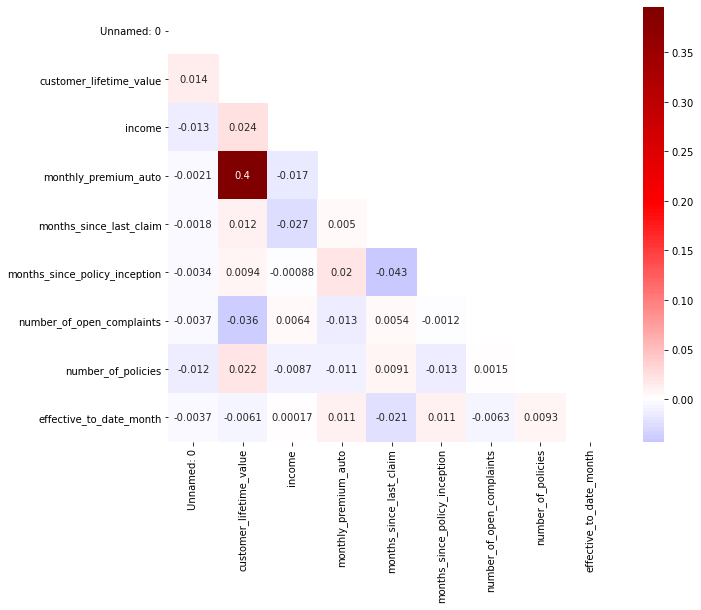

In [33]:
## Look at potential multicollinearity using a correlation matrix or other approach.
correlations_matrix=data.corr()
mask=np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax= plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap='seismic', center=0)
plt.show()

In [34]:
## Encoding Categorical Data fields using OHE.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [35]:
## Bring categorical and numerical columns back together using pd.concat.

In [36]:
X=np.concatenate((X_num,encoded),axis=1)

In [37]:
X.shape

(9134, 9186)

In [38]:
y.shape

(9134,)

In [39]:
print(X)

[[0.00000000e+00 2.76351928e+03 5.62740000e+04 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 6.97953590e+03 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.00000000e+00 1.28874317e+04 4.87670000e+04 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [9.13100000e+03 8.16389043e+03 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.13200000e+03 7.52444244e+03 2.19410000e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.13300000e+03 2.61183687e+03 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [43]:
## Splitting into train set and test dataset using random state, eg 80%:20% .
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [45]:
## Apply linear regression model from sklearn.linear_model.
lm=linear_model.LinearRegression()
model=lm.fit(X,y) 
predictions=lm.predict(X) 
r2_score(y, predictions)

1.0

In [46]:
## Fit over your train data and predict against X test.
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train) # teach the model to find the line of best fit 
predictions=lm.predict(X_test) # run predictions based on X_test (we cannot see y_test)
r2_score(y_test, predictions)#compare y_test to predictions 

1.0

In [48]:
## You should gather appropriate metrics to evaluate model accuracy over y_test- such as : R2. MSE. RMSE. MAE.
mse=mean_squared_error(y_test, predictions)
mse

7.12330834102537e-13

In [49]:
rmse=np.sqrt(mse)
rmse

8.439969396286559e-07

In [56]:
from sklearn.metrics import mean_absolute_error
mea=mean_absolute_error(y_test, predictions)
mea

6.141652099567447e-07